In [60]:
import numpy as np
from scipy.signal import savgol_filter
from scipy.interpolate import griddata

%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib as mpl

import sys
sys.path.append("../")
import GSHEWaveform

# Functions to turn on and off custom plotting
def default_mplstyle():
    mpl.rcParams.update(mpl.rcParamsDefault)
    
def custom_mplstyle():
    mpl.style.use("../plot_style.txt")
    
def ylabel_with_offset(ax, label):
    ax.yaxis.offsetText.set_visible(False)
    offset = ax.yaxis.get_major_formatter().get_offset()
    ax.set_ylabel(r"{} {}".format(label, offset))
    
    
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Dependence on $\theta_{\rm obs}$

In [23]:
runID = "01"


Xgeos = np.load("../data/{}_Xgeos.npy".format(runID))
Xgshes = np.load("../data/{}_Xgshes.npy".format(runID))
epsilons = np.load("../data/{}_Epsilons.npy".format(runID))
alphas = np.load("../data/{}_alphas.npy".format(runID))
betas = np.load("../data/{}_betas.npy".format(runID))
thetaobs = np.load("../data/{}_VaryParam.npy".format(runID))

# k = 80
# print(x[k]/np.pi)

# Xgeo = Xgeos[k, ...]
# Xgshe = Xgshes[k, ...]

<IPython.core.display.Javascript object>


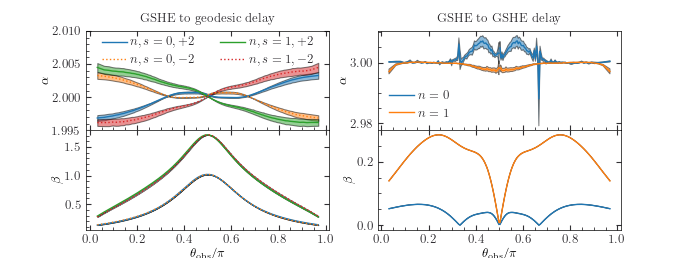

In [56]:
custom_mplstyle()
polardict = {0: "+2", 1: "-2"}
polarls = {0: "-", 1: "dotted"}

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(3.45*2, 3.45*0.75), sharex='col')
fig.subplots_adjust(hspace=0, wspace=0.2)


for n in range(2):
    for s in range(2):
        for k, par in enumerate([alphas, betas]):
            mu = par[:, n, s, 0]
            std = par[:, n, s, 1]
            lower = mu - std
            upper = mu + std
            
            if k == 0:
                label = r"$n, s = {},{}$".format(n, polardict[s])
            else:
                label = None

            axes[k, 0].plot(thetaobs/np.pi, mu, label=label, ls=polarls[s])
            axes[k, 0].fill_between(thetaobs/np.pi, mu - std, mu + std, alpha=0.5)


for n in range(2):
    for k, par in enumerate([alphas, betas]):
        mu = par[:, n, 2, 0]
        std = par[:, n, 2, 1]

        if k == 0:
            label = r"$n = {}$".format(n)
        else:
            label = None

        axes[k, 1].plot(thetaobs/np.pi, mu, label=label)
        axes[k, 1].fill_between(thetaobs/np.pi, mu - std, mu + std, alpha=0.5)

        
        
for i in range(2):
    axes[1, i].set_xlabel(r"$\theta_{\rm obs} / \pi$")
    axes[0, i].set_ylabel(r"$\alpha$")
    axes[1, i].set_ylabel(r"$\beta$")
    
axes[0, 0].set_title("GSHE to geodesic delay")
axes[0, 1].set_title("GSHE to GSHE delay")
axes[0, 0].set_ylim(1.995, 2.01)
axes[0, 0].legend(ncol=2, loc=9, bbox_to_anchor=(0.5, 1.05))
# axes[0, 0].legend(ncol=2, loc="best")
# axes[0, 0].set_ylim(1.995, 2.009)
# axes[0, 1].legend(ncol=2, loc=9, bbox_to_anchor=(0.5, 1.25))
axes[0, 1].legend(ncol=1, loc="best")

fig.savefig("/Users/richard/Downloads/powerlaw_fit.pdf", dpi=400, bbox_inches="tight") 
fig.show()

# Dependence on $r_{\rm src}$

In [11]:
runID = "08"

with open("../data/{}_Description.txt".format(runID)) as f:
    description = f.read()
print(description)


Xgeos = np.load("../data/{}_Xgeos.npy".format(runID))
Xgshes = np.load("../data/{}_Xgshes.npy".format(runID))
epsilons = np.load("../data/{}_Epsilons.npy".format(runID))
alphas = np.load("../data/{}_alphas.npy".format(runID))
betas = np.load("../data/{}_betas.npy".format(runID))
rsrc = np.load("../data/{}_VaryParam.npy".format(runID)) / 2

m = rsrc < 15
alphas = betas[m, ...]
betas = betas[m, ...]
rsrc = rsrc[m]

Varying the r source
Source:
GSHEIntegrator.SphericalCoords{Float64}
  t: Float64 0.0
  r: Float64 2.5
  θ: Float64 1.5707963267948966
  ϕ: Float64 0.0

Observer:
GSHEIntegrator.SphericalCoords{Float64}
  t: Float64 0.0
  r: Float64 100.0
  θ: Float64 1.2566370614359172
  ϕ: Float64 2.356194490192345

BH spin
a = 0.99
ODE Options
GSHEIntegrator.ODESolverOptions
  reltol: Float64 1.0e-14
  abstol: Float64 1.0e-14
  maxiters: Int64 5000
  interp_points: Int64 10
  Δθ: Float64 0.0005
  horizon_tol: Float64 1.01
  no_loops: Bool true
  verbose: Bool false

GSHEIntegrator.OptimiserOptions
  radius_reltol: Float64 1.0e-10
  angdist_to_old: Float64 1.0e-9
  τ_to_old: Float64 1.0e-9
  Nattempts_geo: Int64 100
  Nattempts_gshe: Int64 20
  loss_atol: Float64 1.0e-12
  optim_options: Optim.Options{Float64, Nothing}
  alg: Optim.NelderMead{Optim.AffineSimplexer, Optim.AdaptiveParameters}
  θmax0: Float64 0.04
  gshe_convergence_verbose: Bool false




<IPython.core.display.Javascript object>


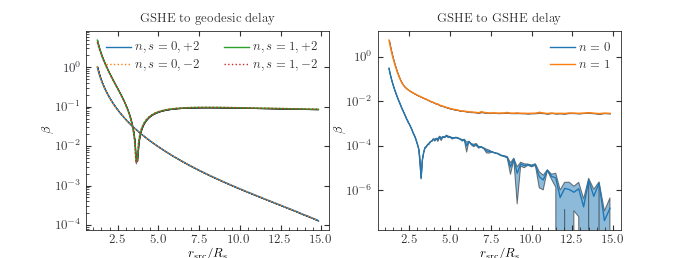

In [21]:
custom_mplstyle()
polardict = {0: "+2", 1: "-2"}
polarls = {0: "-", 1: "dotted"}

fig, axes = plt.subplots(ncols=2, figsize=(3.45*2, 3.45*0.75))
fig.subplots_adjust(hspace=0, wspace=0.2)


for n in range(2):
    for s in range(2):
        mu = betas[:, n, s, 0]
        std = betas[:, n, s, 1]
            
        label = r"$n, s = {},{}$".format(n, polardict[s])
        axes[0].plot(rsrc, mu, label=label, ls=polarls[s])
        axes[0].fill_between(rsrc, mu - std, mu + std, alpha=0.5)


for n in range(2):
    mu = betas[:, n, 2, 0]
    std = betas[:, n, 2, 1]
        
    label = r"$n = {}$".format(n)

    axes[1].plot(rsrc, mu, label=label)
    axes[1].fill_between(rsrc,mu - std, mu+std, alpha=0.5)

        
for i in range(2):
    axes[i].set_xlabel(r"$r_{\rm src} / R_{\rm s}$")
    axes[i].set_ylabel(r"$\beta$")
    axes[i].set_yscale("log")
    


axes[0].set_title("GSHE to geodesic delay")
axes[1].set_title("GSHE to GSHE delay")

axes[0].legend(ncol=2, loc="best")
axes[1].legend(ncol=1, loc="best")


fig.savefig("/Users/richard/Downloads/radial_powerlaw_fit.pdf", dpi=400, bbox_inches="tight") 
fig.show()

# Dependence on $a$

In [57]:
runID = "09"


with open("../data/{}_Description.txt".format(runID)) as f:
    description = f.read()

print(description)

Xgeos = np.load("../data/{}_Xgeos.npy".format(runID))
Xgshes = np.load("../data/{}_Xgshes.npy".format(runID))
epsilons = np.load("../data/{}_Epsilons.npy".format(runID))
alphas = np.load("../data/{}_alphas.npy".format(runID))
betas = np.load("../data/{}_betas.npy".format(runID))
BHspin = np.load("../data/{}_VaryParam.npy".format(runID))

Varying the BH spin
Source:
GSHEIntegrator.SphericalCoords{Float64}
  t: Float64 0.0
  r: Float64 4.0
  θ: Float64 1.5707963267948966
  ϕ: Float64 0.0

Observer:
GSHEIntegrator.SphericalCoords{Float64}
  t: Float64 0.0
  r: Float64 100.0
  θ: Float64 1.2566370614359172
  ϕ: Float64 3.141592653589793

BH spin
a = 0.001
ODE Options
GSHEIntegrator.ODESolverOptions
  reltol: Float64 1.0e-14
  abstol: Float64 1.0e-14
  maxiters: Int64 5000
  interp_points: Int64 10
  Δθ: Float64 0.0005
  horizon_tol: Float64 1.01
  no_loops: Bool true
  verbose: Bool false

GSHEIntegrator.OptimiserOptions
  radius_reltol: Float64 1.0e-10
  angdist_to_old: Float64 1.0e-9
  τ_to_old: Float64 1.0e-9
  Nattempts_geo: Int64 30
  Nattempts_gshe: Int64 10
  loss_atol: Float64 1.0e-12
  optim_options: Optim.Options{Float64, Nothing}
  alg: Optim.NelderMead{Optim.AffineSimplexer, Optim.AdaptiveParameters}
  θmax0: Float64 0.04
  gshe_convergence_verbose: Bool false




<IPython.core.display.Javascript object>


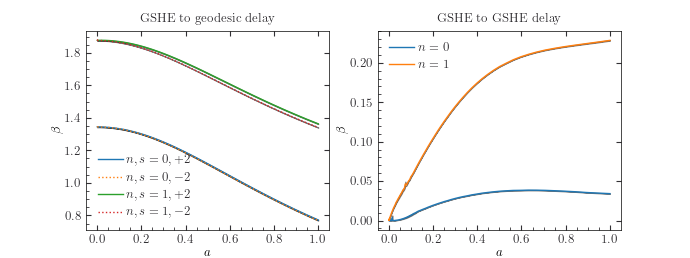

In [59]:
custom_mplstyle()
polardict = {0: "+2", 1: "-2"}
polarls = {0: "-", 1: "dotted"}

fig, axes = plt.subplots(ncols=2, figsize=(3.45 * 2, 3.45*0.75))
fig.subplots_adjust(hspace=0, wspace=0.2)


for n in range(2):
    for s in range(2):
        mu = betas[:, n, s, 0]
        std = betas[:, n, s, 1]

        label = r"$n, s = {},{}$".format(n, polardict[s])

        axes[0].plot(BHspin, mu, label=label, ls=polarls[s])
        axes[0].fill_between(BHspin, mu - std, mu + std, alpha=0.5)


for n in range(2):
    mu = betas[:, n, 2, 0]
    std = betas[:, n, 2, 1]

    label = r"$n = {}$".format(n)

    axes[1].plot(BHspin, mu, label=label)
    axes[1].fill_between(BHspin, mu - std, mu + std, alpha=0.5)

        
        
for i in range(2):
    axes[i].set_xlabel(r"$a$")
    axes[i].set_ylabel(r"$\beta$")
    axes[i].legend(ncol=1, loc="best")
    
axes[0].set_title("GSHE to geodesic delay")
axes[1].set_title("GSHE to GSHE delay")

fig.savefig("/Users/richard/Downloads/BHspin_fit.pdf", dpi=400, bbox_inches="tight") 
fig.show()

# Dependence on geodesic direction

In [61]:
runID = "10"


with open("../data/{}_Description.txt".format(runID)) as f:
    description = f.read()
print(description)


Xgeo = np.load("../data/{}_Xgeo.npy".format(runID))
Xgshe = np.load("../data/{}_Xgshe.npy".format(runID))
epsilons = np.load("../data/{}_Epsilons.npy".format(runID))
alphas = np.load("../data/{}_alphas.npy".format(runID))
betas = np.load("../data/{}_betas.npy".format(runID))
xs = np.load("../data/{}_xs.npy".format(runID))
ys = np.load("../data/{}_ys.npy".format(runID))


X, Y = np.meshgrid(xs, ys)

N = 1000
high_xs = high_ys = np.linspace(-1, 1, N)

highX, highY = np.meshgrid(high_xs, high_ys)

Shooting, only observer radius important!
Source:
GSHEIntegrator.SphericalCoords{Float64}
  t: Float64 0.0
  r: Float64 10.0
  θ: Float64 1.5707963267948966
  ϕ: Float64 0.0

Observer:
GSHEIntegrator.SphericalCoords{Float64}
  t: Float64 0.0
  r: Float64 100.0
  θ: Float64 1.2566370614359172
  ϕ: Float64 3.141592653589793

BH spin
a = 0.8
ODE Options
GSHEIntegrator.ODESolverOptions
  reltol: Float64 1.0e-14
  abstol: Float64 1.0e-14
  maxiters: Int64 5000
  interp_points: Int64 10
  Δθ: Float64 0.0005
  horizon_tol: Float64 1.01
  no_loops: Bool true
  verbose: Bool false

GSHEIntegrator.OptimiserOptions
  radius_reltol: Float64 1.0e-10
  angdist_to_old: Float64 1.0e-9
  τ_to_old: Float64 1.0e-9
  Nattempts_geo: Int64 30
  Nattempts_gshe: Int64 10
  loss_atol: Float64 1.0e-12
  optim_options: Optim.Options{Float64, Nothing}
  alg: Optim.NelderMead{Optim.AffineSimplexer, Optim.AdaptiveParameters}
  θmax0: Float64 0.04
  gshe_convergence_verbose: Bool false




In [62]:
ind = np.where(betas[:, 0, 0] > 50)[0][0]
print(ind)

alphas[ind, ...] = np.nan
betas[ind, ...] = np.nan

1884


In [63]:
highZ = griddata(np.vstack([X.reshape(-1, ), Y.reshape(-1,)]).T, betas[:, 0, 0],
                 np.vstack([highX.reshape(-1, ), highY.reshape(-1,)]).T, method="linear"
                ).reshape(highX.shape)


custom_mplstyle()

fig, ax = plt.subplots()
cm = ax.pcolormesh(highX, highY, np.log10(highZ), shading="auto", cmap="jet", rasterized=True)
fig.colorbar(cm, ax=ax, label=r"$\log \beta$")
ax.set_xlabel("$k_2$")
ax.set_ylabel("$k_3$")

plt.savefig("/Users/richard/Downloads/shadow_beta.pdf", dpi=450, bbox_inches="tight")
fig.show()

<IPython.core.display.Javascript object>